In [2]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [4]:
#Loading the dataset
data = pd.read_csv('https://hands-on.cloud/wp-content/uploads/2022/04/Dushanbe_house.csv')
data.head(10)

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
2,2,3,8,50.0,NaN,NaN,700000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000
5,5,3,4,53.0,38.530686,68.745261,513000
6,6,2,12,67.0,38.587168,68.786996,360000
7,7,2,4,52.0,NaN,NaN,397000
8,8,2,7,95.0,NaN,NaN,499000
9,9,2,15,73.0,38.538394,68.754725,450000


In [7]:
#Dropping the unecessary column
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(10)

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000
5,3,4,53.0,38.530686,68.745261,513000
6,2,12,67.0,38.587168,68.786996,360000
7,2,4,52.0,NaN,NaN,397000
8,2,7,95.0,NaN,NaN,499000
9,2,15,73.0,38.538394,68.754725,450000


* The datatset contains NaN(NULL values) and they will be handled automatically by the algorithm.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   number_of_rooms  5579 non-null   int64  
 1   floor            5579 non-null   int64  
 2   area             5579 non-null   float64
 3   latitude         3730 non-null   float64
 4   longitude        3730 non-null   float64
 5   price            5579 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 261.6 KB


In [9]:
data.describe()

,number_of_rooms,floor,area,latitude,longitude,price
count,5579.000000,5579.000000,5579.000000,3730.000000,3730.000000,5.579000e+03
mean,2.502420,7.106291,78.076358,38.553452,68.768399,5.840748e+05
std,1.228378,4.577408,38.749944,0.030199,0.056909,4.129821e+05
min,1.000000,0.000000,16.000000,37.511664,68.667721,3.900000e+02
25%,2.000000,3.000000,50.000000,38.530576,68.739065,3.430000e+05
50%,2.000000,6.000000,68.000000,38.560678,68.761022,4.850000e+05
75%,3.000000,10.000000,93.000000,38.572482,68.789177,7.000000e+05
max,6.000000,23.000000,370.000000,38.615876,71.509309,8.814000e+06


In [11]:
(data.isnull().sum() / len(data)) * 100

number_of_rooms     0.00000
floor               0.00000
area                0.00000
latitude           33.14214
longitude          33.14214
price               0.00000
dtype: float64

In [13]:
#Calculating the correlation
corrMatrix = data.corr()
corrMatrix

,number_of_rooms,floor,area,latitude,longitude,price
number_of_rooms,1.000000,0.037019,0.749612,0.048279,0.017549,0.594876
floor,0.037019,1.000000,0.281956,0.073479,0.051819,0.094023
area,0.749612,0.281956,1.000000,0.102166,0.076320,0.718130
latitude,0.048279,0.073479,0.102166,1.000000,-0.428405,0.097400
longitude,0.017549,0.051819,0.076320,-0.428405,1.000000,0.056808
price,0.594876,0.094023,0.718130,0.097400,0.056808,1.000000


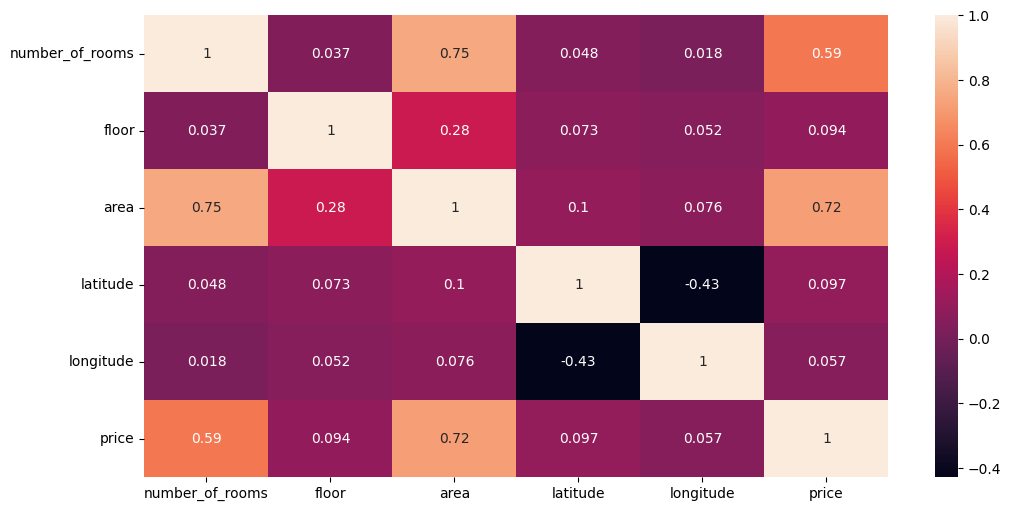

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [16]:
#Splitting the dataset
#taking the columns from the dataset
columns = data.columns
columns

Index(['number_of_rooms', 'floor', 'area', 'latitude', 'longitude', 'price'], dtype='object')

In [17]:
#Storing the input and output variables
x = data[columns[0:-1]]
x

,number_of_rooms,floor,area,latitude,longitude
0,1,1,58.0,38.585834,68.793715
1,1,14,68.0,38.522254,68.749918
2,3,8,50.0,NaN,NaN
3,3,14,84.0,38.520835,68.747908
4,3,3,83.0,38.564374,68.739419
...,...,...,...,...,...
5574,4,16,125.0,NaN,NaN
5575,2,17,71.0,NaN,NaN
5576,1,9,51.0,NaN,NaN
5577,6,6,200.0,NaN,NaN


In [18]:
y = data[columns[-1]]
y

0        330000
1        340000
2        700000
3        700000
4        415000
         ...   
5574     600000
5575     489900
5576     361220
5577    1500000
5578     304650
Name: price, Length: 5579, dtype: int64

In [19]:
#Splitting the dataset into testing and training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
print('Shape of the training input data is:',x_train.shape)
print('Shape of the testing input data is:',x_test.shape)

Shape of the training input data is: (4184, 5)
Shape of the testing input data is: (1395, 5)


In [21]:
#Creating the model
cbr = CatBoostRegressor()
cbr

In [22]:
#Training the model
cbr.fit(x_train,y_train)

Learning rate set to 0.051332
0:	learn: 420459.0365754	total: 167ms	remaining: 2m 46s
1:	learn: 411420.7824370	total: 169ms	remaining: 1m 24s
2:	learn: 403082.0369085	total: 172ms	remaining: 57.2s
3:	learn: 395742.8350833	total: 175ms	remaining: 43.5s
4:	learn: 388627.6768460	total: 177ms	remaining: 35.3s
5:	learn: 381946.9642123	total: 181ms	remaining: 29.9s
6:	learn: 375175.8125667	total: 184ms	remaining: 26.1s
7:	learn: 368008.4824813	total: 188ms	remaining: 23.3s
8:	learn: 362388.9008808	total: 190ms	remaining: 21s
9:	learn: 357596.3193958	total: 193ms	remaining: 19.1s
10:	learn: 353140.8918512	total: 196ms	remaining: 17.6s
11:	learn: 348574.2751007	total: 198ms	remaining: 16.3s
12:	learn: 344297.9320866	total: 201ms	remaining: 15.3s
13:	learn: 340580.4087751	total: 204ms	remaining: 14.3s
14:	learn: 335786.3533895	total: 206ms	remaining: 13.5s
15:	learn: 332522.6082611	total: 209ms	remaining: 12.9s
16:	learn: 328152.3304138	total: 212ms	remaining: 12.2s
17:	learn: 325159.5834689	to

In [23]:
#Making predictions
predict = cbr.predict(x_test)
predict

array([343936.33270198, 502867.44230943, 567885.75787084, ...,
       407943.97107577, 659093.46073551, 646208.5621795 ])

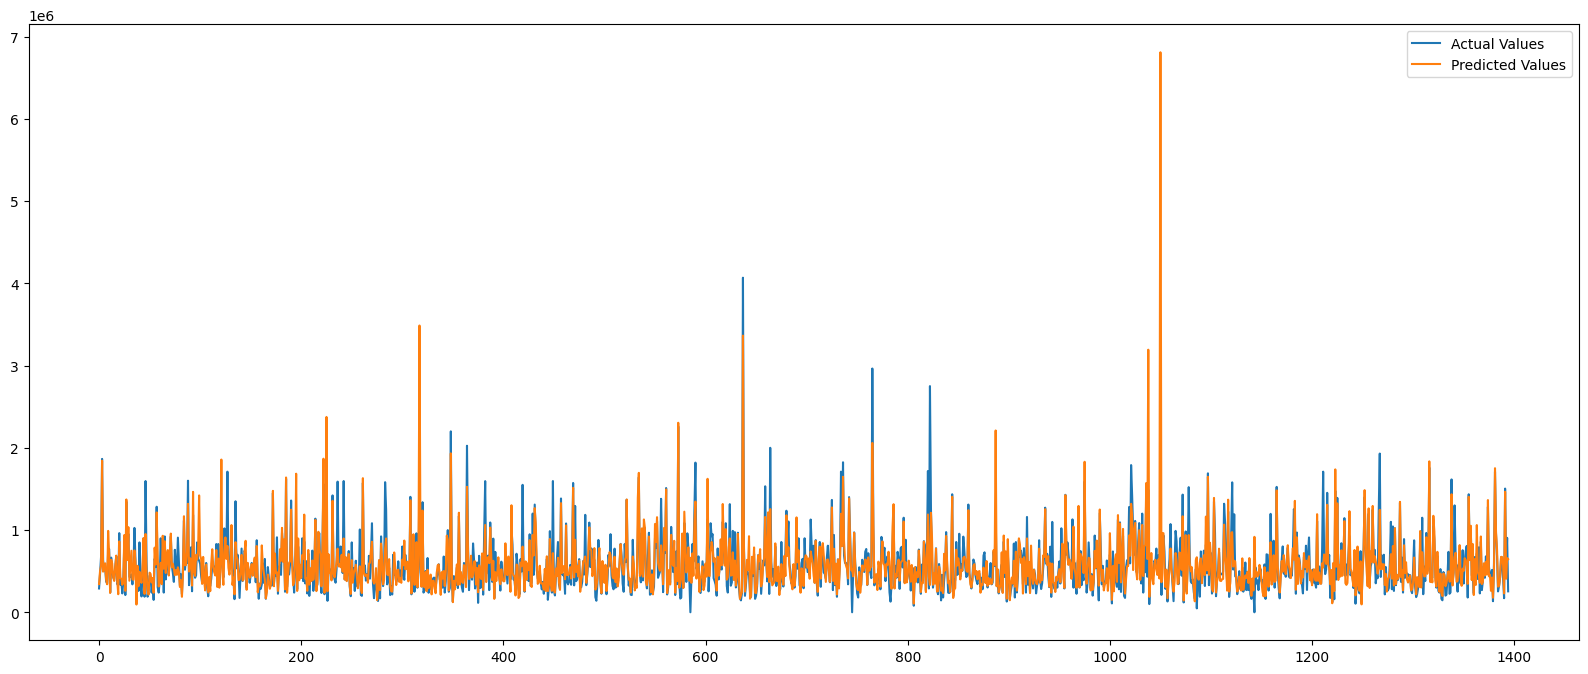

In [24]:
plt.figure(figsize=(20,8))
plt.plot([i for i in range(len(y_test))],y_test,label='Actual Values')
plt.plot([i for i in range(len(y_test))],predict,label='Predicted Values')
plt.legend()
plt.show()

Mean of the actual values: 575842.8207885305
Mean of predicted values: 578156.1148940979


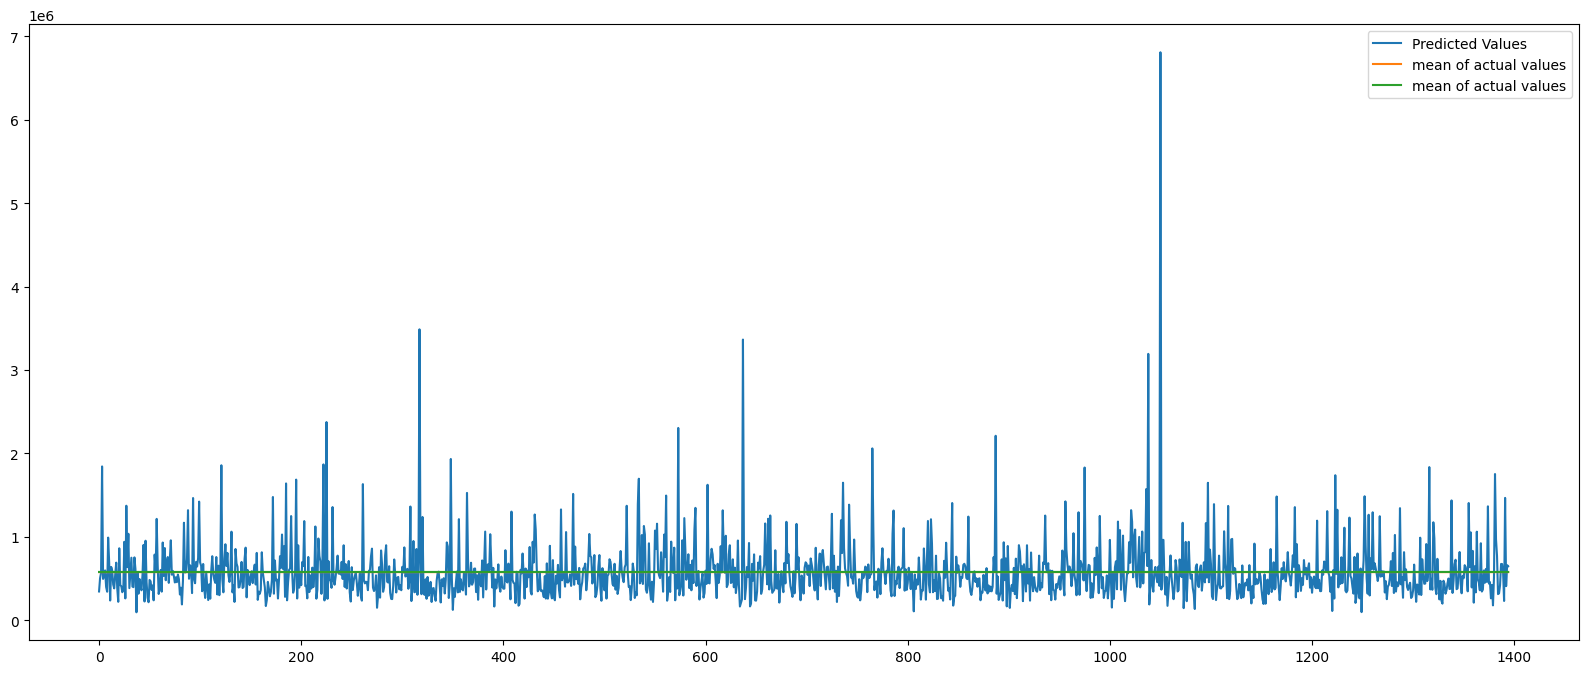

In [25]:
plt.figure(figsize=(20,8))
print('Mean of the actual values:',y_test.mean())
print('Mean of predicted values:',predict.mean())
plt.plot([i for i in range(len(y_test))],predict,label='Predicted Values')
plt.plot([i for i in range(len(y_test))],[y_test.mean() for x in range(len(y_test))],label='mean of actual values')
plt.plot([i for i in range(len(y_test))],[predict.mean() for x in range(len(y_test))],label='mean of actual values')
plt.legend()
plt.show()

In [26]:
#Checking the model accuracy
print('R-square is:',r2_score(y_test,predict))

R-square is: 0.5116281537741856
